<a href="https://colab.research.google.com/github/Aniketxmishra/el/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Download and load the Titanic dataset
# You can upload the CSV file to Colab or use this method
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [2]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# For regression, we'll predict Age using other features
# First, let's clean the data
df_clean = df.copy()

# Fill missing Embarked with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Fill missing Fare with median
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

# For this regression task, we'll predict Age using other features
# Remove rows where Age is missing for our target variable
df_regression = df_clean.dropna(subset=['Age']).copy()

print(f"Dataset shape after removing missing Age: {df_regression.shape}")


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Dataset shape after removing missing Age: (714, 12)


In [3]:
# Encode categorical variables
le_sex = LabelEncoder()
df_regression['Sex_encoded'] = le_sex.fit_transform(df_regression['Sex'])

le_embarked = LabelEncoder()
df_regression['Embarked_encoded'] = le_embarked.fit_transform(df_regression['Embarked'])

# Create family size feature
df_regression['FamilySize'] = df_regression['SibSp'] + df_regression['Parch'] + 1

# Select features for regression
features_for_regression = ['Pclass', 'Sex_encoded', 'SibSp', 'Parch',
                          'Fare', 'Embarked_encoded', 'FamilySize']

X = df_regression[features_for_regression]
y = df_regression['Age']  # Predicting Age

print("Features used for regression:")
print(X.columns.tolist())
print(f"\nTarget variable: Age")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Features used for regression:
['Pclass', 'Sex_encoded', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded', 'FamilySize']

Target variable: Age
X shape: (714, 7), y shape: (714,)


In [4]:
# Simple Linear Regression - using Fare to predict Age
X_simple = df_regression[['Fare']]
y_simple = df_regression['Age']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Fit the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression Results (Fare → Age):")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R² Score: {r2_simple:.3f}")
print(f"Coefficient: {simple_model.coef_[0]:.3f}")
print(f"Intercept: {simple_model.intercept_:.3f}")


Simple Linear Regression Results (Fare → Age):
MAE: 10.98
MSE: 188.21
R² Score: -0.015
Coefficient: 0.031
Intercept: 28.914


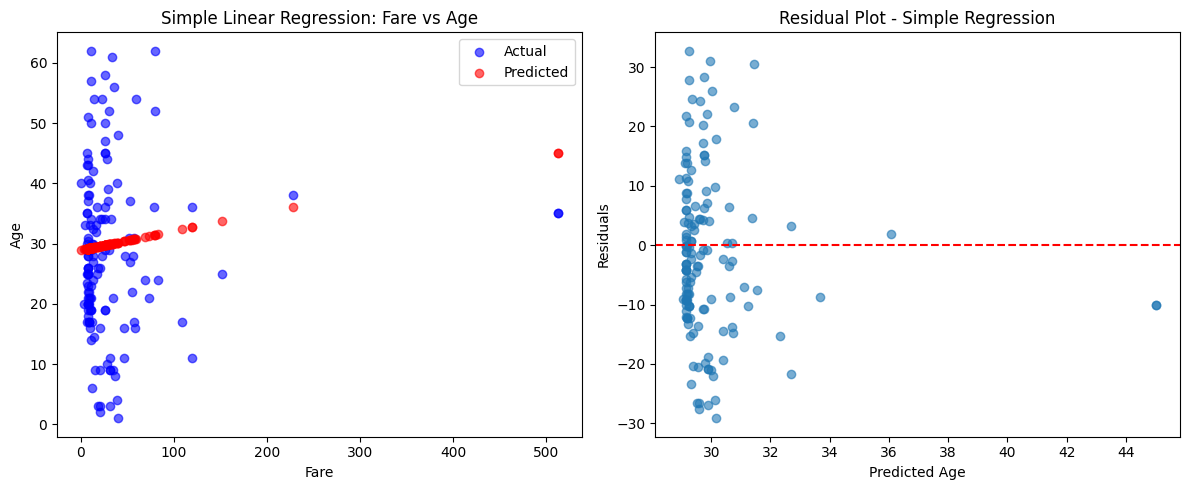

In [5]:
# Plot the regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_simple, y_test_simple, alpha=0.6, label='Actual', color='blue')
plt.scatter(X_test_simple, y_pred_simple, alpha=0.6, label='Predicted', color='red')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Simple Linear Regression: Fare vs Age')
plt.legend()

# Residual plot
plt.subplot(1, 2, 2)
residuals_simple = y_test_simple - y_pred_simple
plt.scatter(y_pred_simple, residuals_simple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Regression')

plt.tight_layout()
plt.show()


In [6]:
# Multiple Linear Regression using all selected features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
multiple_model = LinearRegression()
multiple_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_multiple = multiple_model.predict(X_test_scaled)

# Evaluate the model
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Multiple Linear Regression Results:")
print(f"MAE: {mae_multiple:.2f}")
print(f"MSE: {mse_multiple:.2f}")
print(f"R² Score: {r2_multiple:.3f}")


Multiple Linear Regression Results:
MAE: 9.57
MSE: 139.50
R² Score: 0.248


Feature Importance (by coefficient magnitude):
            Feature  Coefficient  Abs_Coefficient
0            Pclass    -6.186368         6.186368
2             SibSp    -2.558724         2.558724
1       Sex_encoded     2.016809         2.016809
6        FamilySize    -1.380714         1.380714
4              Fare    -0.782141         0.782141
5  Embarked_encoded     0.737081         0.737081
3             Parch     0.312501         0.312501


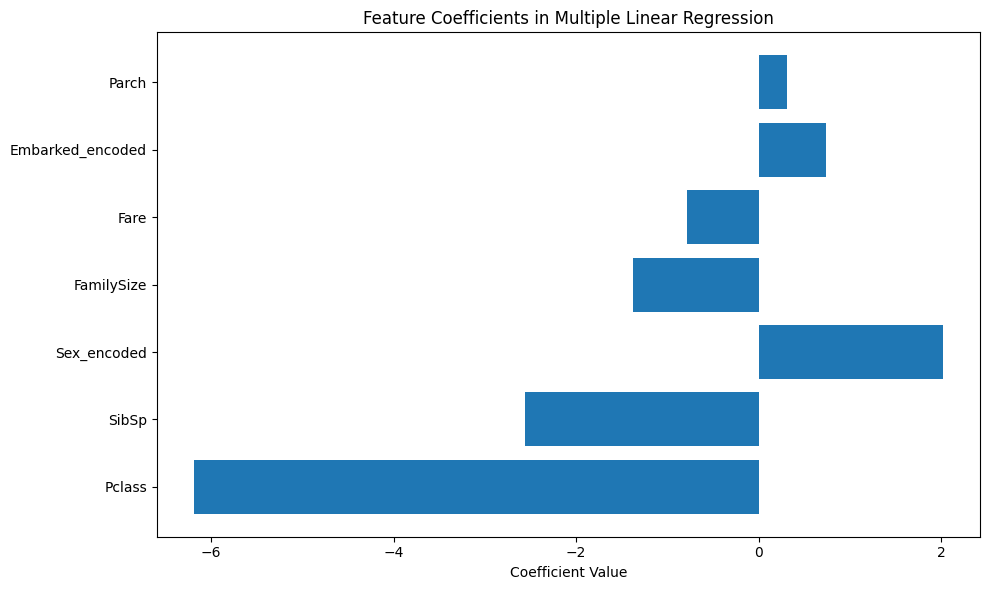

In [7]:
# Feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': features_for_regression,
    'Coefficient': multiple_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Multiple Linear Regression')
plt.tight_layout()
plt.show()


In [8]:
# Alternative: Predict Fare using other features
# Remove rows where Fare is missing
df_fare_regression = df_clean.dropna(subset=['Fare']).copy()

# Encode categorical variables
df_fare_regression['Sex_encoded'] = le_sex.fit_transform(df_fare_regression['Sex'])
df_fare_regression['Embarked_encoded'] = le_embarked.fit_transform(df_fare_regression['Embarked'])

# Fill missing Age with median for this analysis
df_fare_regression['Age'].fillna(df_fare_regression['Age'].median(), inplace=True)

# Features to predict Fare
fare_features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Embarked_encoded']
X_fare = df_fare_regression[fare_features]
y_fare = df_fare_regression['Fare']

# Split and train
X_train_fare, X_test_fare, y_train_fare, y_test_fare = train_test_split(
    X_fare, y_fare, test_size=0.2, random_state=42
)

# Scale features
scaler_fare = StandardScaler()
X_train_fare_scaled = scaler_fare.fit_transform(X_train_fare)
X_test_fare_scaled = scaler_fare.transform(X_test_fare)

# Train model
fare_model = LinearRegression()
fare_model.fit(X_train_fare_scaled, y_train_fare)

# Predictions and evaluation
y_pred_fare = fare_model.predict(X_test_fare_scaled)

mae_fare = mean_absolute_error(y_test_fare, y_pred_fare)
mse_fare = mean_squared_error(y_test_fare, y_pred_fare)
r2_fare = r2_score(y_test_fare, y_pred_fare)

print("Fare Prediction Results:")
print(f"MAE: {mae_fare:.2f}")
print(f"MSE: {mse_fare:.2f}")
print(f"R² Score: {r2_fare:.3f}")


Fare Prediction Results:
MAE: 20.84
MSE: 928.44
R² Score: 0.400


Model Comparison:
                      Model        MAE         MSE        R²
0         Simple (Fare→Age)  10.979130  188.211012 -0.015139
1   Multiple (Features→Age)   9.573861  139.498205  0.247600
2  Multiple (Features→Fare)  20.837023  928.436441  0.400014


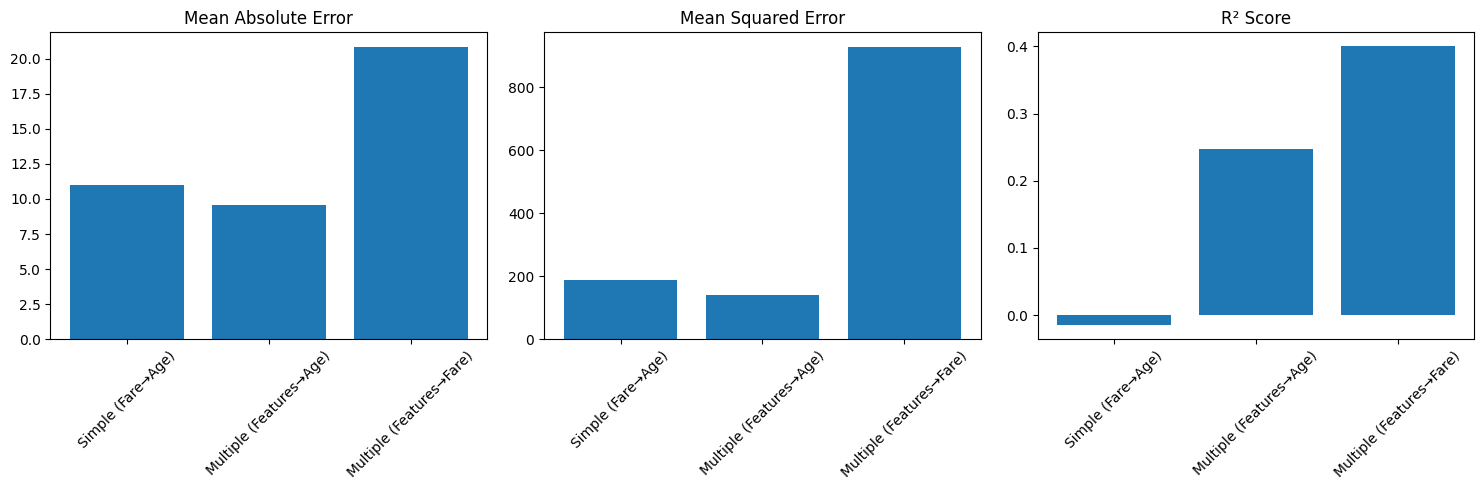

In [9]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Simple (Fare→Age)', 'Multiple (Features→Age)', 'Multiple (Features→Fare)'],
    'MAE': [mae_simple, mae_multiple, mae_fare],
    'MSE': [mse_simple, mse_multiple, mse_fare],
    'R²': [r2_simple, r2_multiple, r2_fare]
})

print("Model Comparison:")
print(comparison)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(comparison['Model'], comparison['MAE'])
plt.title('Mean Absolute Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(comparison['Model'], comparison['MSE'])
plt.title('Mean Squared Error')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(comparison['Model'], comparison['R²'])
plt.title('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
